In [0]:
!pip install networkx

You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-35fed843-f3f7-48cb-99cd-19d863678256/bin/python -m pip install --upgrade pip' command.


/databricks/spark/python/pyspark/sql/dataframe.py:129: UserWarning: DataFrame constructor is internal. Do not directly use it.
  warnings.warn("DataFrame constructor is internal. Do not directly use it.")


id,pagerank
ID2,1.4670296430732002
ID3,1.367211131276467
ID5,0.8227465214761042
ID1,0.6715063520871143
ID4,0.6715063520871143


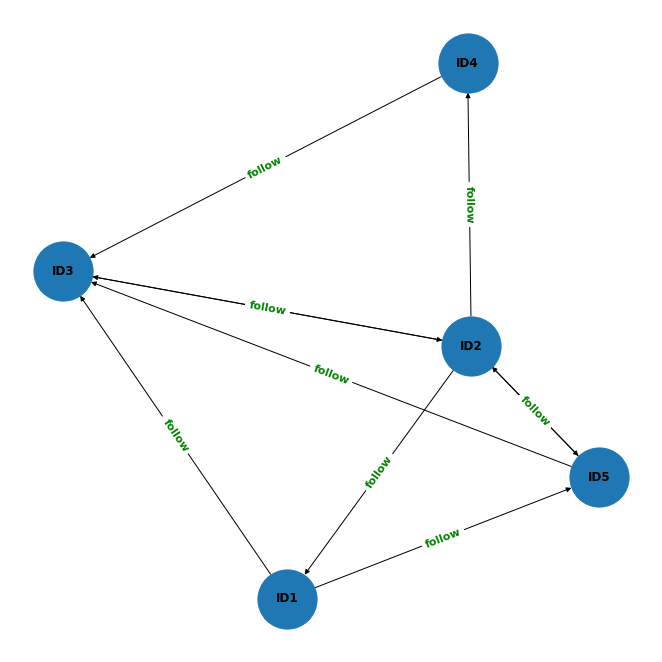

In [0]:
import networkx as nx
import matplotlib.pyplot as plt
from graphframes import *


def plot_directed_graph(edge_list):
    plt.figure(figsize=(9,9))
    gplot=nx.DiGraph()
    edge_labels = {}
    
    for row in edge_list.select("src", "dst", "relationship").take(1000):
        gplot.add_edge(row["src"], row["dst"])
        edge_labels[(row["src"], row["dst"])] = row["relationship"]
    
    pos = nx.spring_layout(gplot)
    nx.draw(gplot, pos, with_labels=True, font_weight="bold", node_size=3500)
    nx.draw_networkx_edge_labels(gplot, pos, edge_labels=edge_labels, font_color="green", font_size=11, font_weight="bold")

vertices_data = [
    {"id": 'ID1'},
    {"id": 'ID2'},
    {"id": 'ID3'},
    {"id": 'ID4'},
    {"id": 'ID5'}
]

vertices = sqlContext.createDataFrame(vertices_data)

edges = sqlContext.createDataFrame([
  ("ID1", "ID3", "follow"),
  ("ID1", "ID5", "follow"),
  ("ID2", "ID1", "follow"),
  ("ID2", "ID5", "follow"),
  ("ID2", "ID4", "follow"),
  ("ID2", "ID3", "follow"),
  ("ID3", "ID2", "follow"),
  ("ID4", "ID3", "follow"),
  ("ID5", "ID2", "follow"),
  ("ID5", "ID3", "follow")
], ["src", "dst", "relationship"]) 

g = GraphFrame(vertices, edges)
plot_directed_graph(g.edges)

results = g.pageRank(resetProbability=0.2, tol=0.1)
display(results.vertices)